In [ ]:
""" This code mounts the Google Drive to the Colab notebook environment to access and work with files stored in the drive."""

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""This code changes the current working directory to 'gdrive/My Drive/fruit/'.
 It assumes that you have a Google Drive account and have authorized Colab to access it. 
 This will allow you to access files in your Google Drive."""
 
import os

os.chdir('/content/gdrive/My Drive/fruit/')


In [ ]:
""" Loading the X and y data from a pickle file, which is a serialized Python object."""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("/content/gdrive/MyDrive/fruit/XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/gdrive/MyDrive/fruit/yy.pickle","rb")
y = pickle.load(pickle_in)


In [ ]:
print(len(X)+len(y))


7630


In [ ]:
X = X/255.0


In [ ]:
print(X[3])


[[[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[1.        ]
  [1.        ]
  [0.99607843]
  ...
  [0.99607843]
  [0.99607843]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.99607843]
  [0.99607843]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.99607843]
  [0.99607843]
  [1.        ]]]


In [ ]:
""" This TensorFlow Keras API code trains a CNN. 

First, import the libraries and load the training data X and labels y from pickle files.Sequential API defines CNN architecture. 
To reduce feature map spatial size, the CNN has many convolutional layers followed by max-pooling layers.
 Dropout layers avoid training overfitting. Finally, a fully connected layer with a sigmoid activation function predicts whether an image is a fresh or rotting banana. 
The Adam optimizer and binary cross-entropy loss function compile the model.
 The model is fit to the training data using 32 batches and 5 epochs. 30% of training data is validated."""

import numpy as np

X = np.array(X)
y = np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
84/84 [==============================] - 17s 181ms/step - loss: 0.2418 - accuracy: 0.8816 - val_loss: 0.1335 - val_accuracy: 0.9590
Epoch 2/5
84/84 [==============================] - 17s 201ms/step - loss: 0.0834 - accuracy: 0.9704 - val_loss: 0.1117 - val_accuracy: 0.9537
Epoch 3/5
84/84 [==============================] - 15s 183ms/step - loss: 0.0672 - accuracy: 0.9734 - val_loss: 0.0812 - val_accuracy: 0.9703
Epoch 4/5
84/84 [==============================] - 15s 177ms/step - loss: 0.0639 - accuracy: 0.9760 - val_loss: 0.0930 - val_accuracy: 0.9598
Epoch 5/5
84/84 [==============================] - 15s 178ms/step - loss: 0.0442 - accuracy: 0.9846 - val_loss: 0.0678 - val_accuracy: 0.9703


In [ ]:
# model.save('onefruit-cnn.model')
history = model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)


Epoch 1/5
84/84 [==============================] - 16s 188ms/step - loss: 0.0716 - accuracy: 0.9742 - val_loss: 0.0370 - val_accuracy: 0.9843
Epoch 2/5
84/84 [==============================] - 15s 180ms/step - loss: 0.0452 - accuracy: 0.9813 - val_loss: 0.0528 - val_accuracy: 0.9808
Epoch 3/5
84/84 [==============================] - 15s 179ms/step - loss: 0.0483 - accuracy: 0.9809 - val_loss: 0.0386 - val_accuracy: 0.9834
Epoch 4/5
84/84 [==============================] - 16s 186ms/step - loss: 0.0317 - accuracy: 0.9891 - val_loss: 0.0405 - val_accuracy: 0.9808
Epoch 5/5
84/84 [==============================] - 15s 180ms/step - loss: 0.0284 - accuracy: 0.9888 - val_loss: 0.1260 - val_accuracy: 0.9528


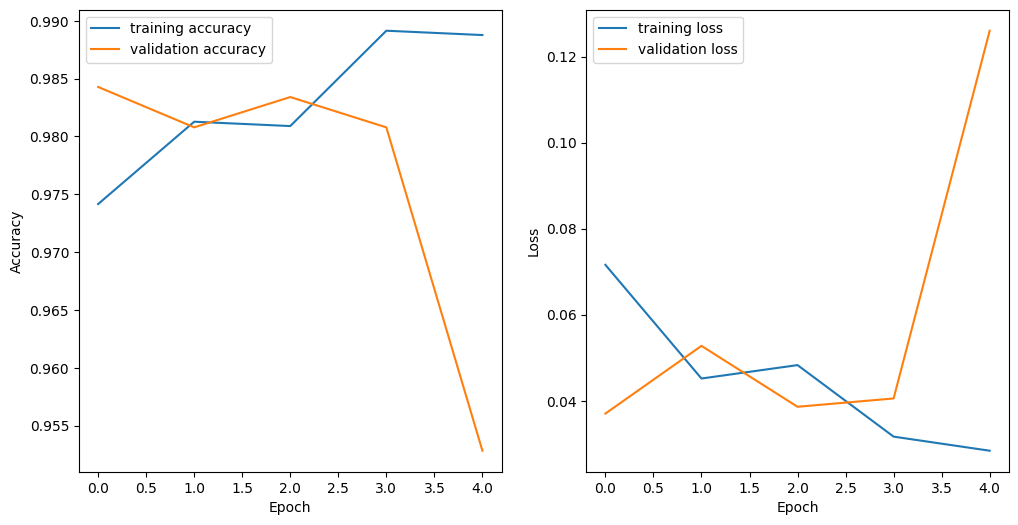

In [ ]:
""" This code imports necessary libraries and modules such as TensorFlow, Matplotlib, Seaborn, and Pickle.
 It also defines a convolutional neural network model using 
 the Sequential API in Keras with multiple layers including Conv2D, MaxPooling2D, Dropout, and Dense layers.
  Then it trains the model using the fit() method with the training data and plots the accuracy and loss over epochs using Matplotlib.
 Finally, it evaluates the model performance using various metrics such as classification_report, confusion_matrix, and accuracy_score from Scikit-Learn. """
 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()





120/120 [==============================] - 5s 43ms/step
Accuracy: 95.94%


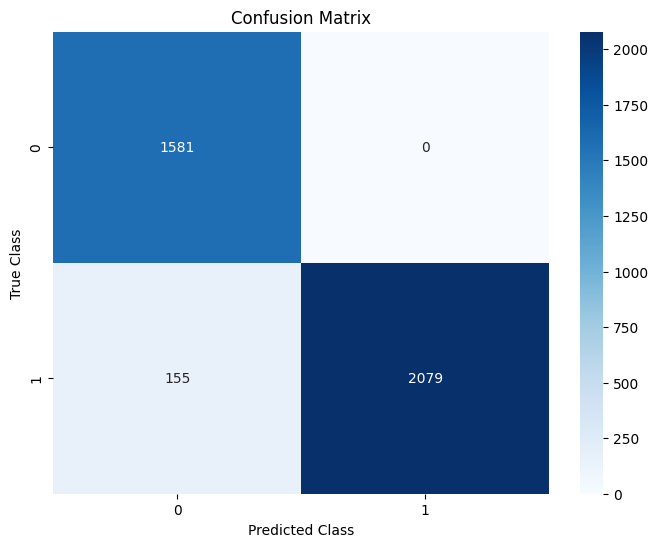

In [ ]:
""" The code above evaluates the performance of the trained model on the training data by 
predicting the classes for each image in the dataset and generating a confusion matrix. 
It then calculates the accuracy score of the model and displays the result alongside the confusion matrix.
 Finally, it visualizes the confusion matrix using a heatmap."""

# Predict the classes for the test data
y_pred = model.predict(X)
y_pred_classes = np.round(y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()